## Calculate gradient

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
import cv2 as cv2
import pandas as pd

### Open image

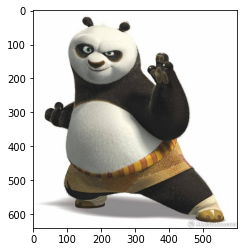

In [46]:
og_im = Image.open('panda.png')
plt.imshow(og_im)
plt.show()
#print(og_im.size)

In [26]:
image = cv2.imread("panda.png")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

### Transform original image to Grayscale

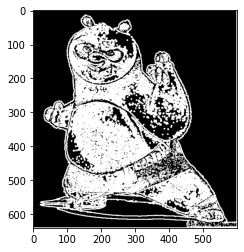

In [57]:
#image = mpimg.imread('panda.png')
R, G, B =image[:, :, 0],image[:, :, 1],image[:, :, 2]
gray_img = 0.2989 * R + 0.587 * G + 0.114 * B
plt.imshow(gray_img, cmap='gray')
plt.show()

### Sobel filter

In [70]:
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(gray_img)
sobel_filtered_image = np.zeros(shape=(rows, columns))

In [71]:
for i in range(rows - 2):
    for j in range(columns - 2):
        sobel_gx = np.sum(np.multiply(Gx, gray_img[i:i + 3, j:j + 3]))
        sobel_gy = np.sum(np.multiply(Gy, gray_img[i:i + 3, j:j + 3]))
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(np.square(sobel_gx) + np.square(sobel_gy))      

/tmp/ipykernel_6306/2132520804.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


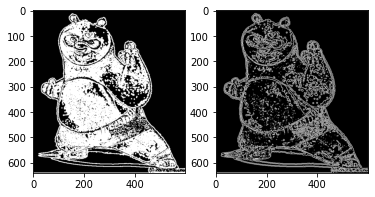

In [60]:
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(gray_img, cmap='gray')
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

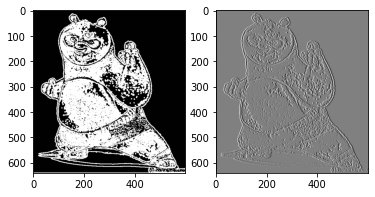

In [61]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
result = ndimage.sobel(gray_img)
ax1.imshow(gray_img)
ax2.imshow(result)
plt.show()

### Prewitt filter

In [35]:
Gx = np.array([[1.0 ,1.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -1.0, -1.0]])
Gy = np.array([[-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0]])
[rows, columns] = np.shape(gray_img)
prewitt_filtered_image = np.zeros(shape=(rows, columns))

In [36]:
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, gray_img[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(Gy, gray_img[i:i + 3, j:j + 3]))
        prewitt_filtered_image[i + 1, j + 1] = np.sqrt(np.square(gx) + np.square(gy))

/tmp/ipykernel_2908/281776762.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


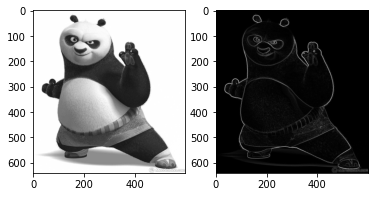

In [37]:
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(gray_img, cmap='gray')
ax2.imshow(prewitt_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

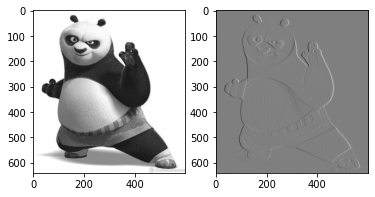

In [38]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
result = ndimage.prewitt(gray_img)
ax1.imshow(gray_img)
ax2.imshow(result)
plt.show()

### Scharr filter

In [72]:
Gx = np.array([[-3.0 ,0.0, 3.0], [-10.0, 0.0, 10.0], [-3.0 ,0.0, 3.0]])
Gy = np.array([[3.0, 10.0, 3.0], [0.0, 0.0, 0.0], [-3.0, -10.0, -3.0]])
[rows, columns] = np.shape(gray_img)
scharr_filtered_image = np.zeros(shape=(rows, columns))

In [73]:
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, gray_img[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(Gy, gray_img[i:i + 3, j:j + 3]))
        scharr_filtered_image[i + 1, j + 1] = np.sqrt(np.square(gx) + np.square(gy))

/tmp/ipykernel_6306/1562267825.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


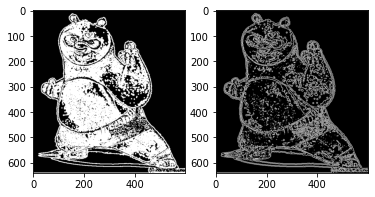

In [74]:
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(gray_img, cmap='gray')
ax2.imshow(scharr_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

### Extras

In [62]:
#gX = cv2.Sobel(gray_img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize= -1)
#gY = cv2.Sobel(gray_img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize= -1)
#gX = cv2.convertScaleAbs(gX)
#gY = cv2.convertScaleAbs(gY)
gX = cv2.convertScaleAbs(sobel_gx)
gY = cv2.convertScaleAbs(sobel_gx)
# combine the gradient representations into a single image
sobel_combined = cv2.addWeighted(gX, 2, gY, 2, 0)

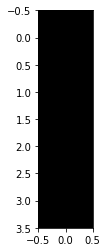

In [63]:
# create a binary thresholded image
_, binary = cv2.threshold(sobel_combined, 0, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [68]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
#image = cv2.drawContours()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


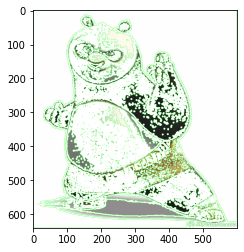

In [69]:
plt.imshow(image)
plt.show()